# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# IMPORTING CSV FILE

In [3]:
bengaluru = pd.read_csv(r"C:\Users\Admin\Desktop\Quantum Learning Project\Bengaluru_House_Data.csv")

# EDA

In [4]:
bengaluru.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
bengaluru.shape

(13320, 9)

In [6]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
bengaluru.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
# Removing duplicates from dataset.

print(bengaluru.duplicated().sum())
bengaluru.drop_duplicates(inplace = True)
print(bengaluru.duplicated().sum())

529
0


In [9]:
# From below it's confirmed that there are null/nan values in the bengaluru house price dataset.

bengaluru.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [10]:
# Dropping unnecesary columns from dataset
bengaluru.drop(["area_type","availability","balcony","society"],axis=1,inplace=True)

# Dropping null values
bengaluru.dropna(inplace=True)

# Checking presence of null values in all the columns left.
bengaluru.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
bengaluru.shape

(12717, 5)

# DATA VISUALIZATION

In [12]:
data = bengaluru.copy()

2.0     6546
3.0     3179
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
40.0       1
18.0       1
27.0       1
15.0       1
Name: bath, dtype: int64


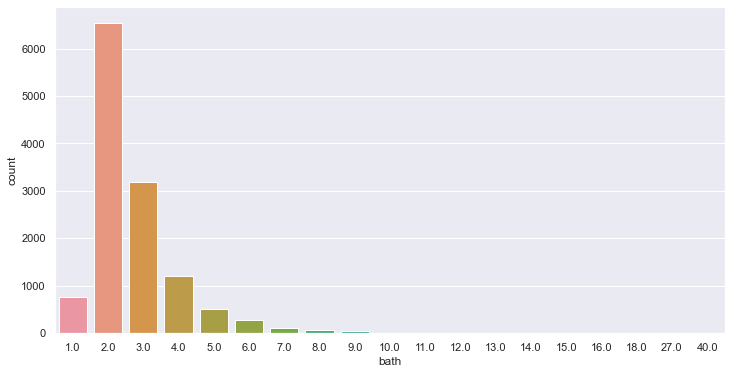

In [13]:
print(data["bath"].value_counts())

plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="bath", data=data)

##### Creating BHK column from size column for conversion from string object to int type.

In [14]:
data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


2     5244
3     4630
4     1376
1      631
5      347
6      221
7       99
8       89
9       54
10      14
11       4
16       1
27       1
43       1
18       1
12       1
13       1
14       1
19       1
Name: BHK, dtype: int64


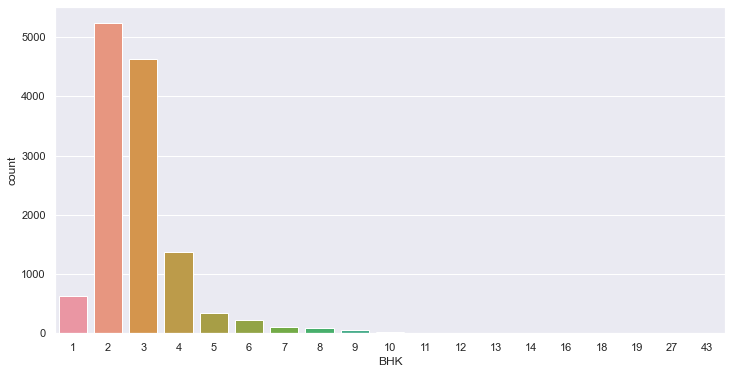

In [15]:
print(data["BHK"].value_counts())

plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="BHK", data=data)

<AxesSubplot:xlabel='price', ylabel='Density'>

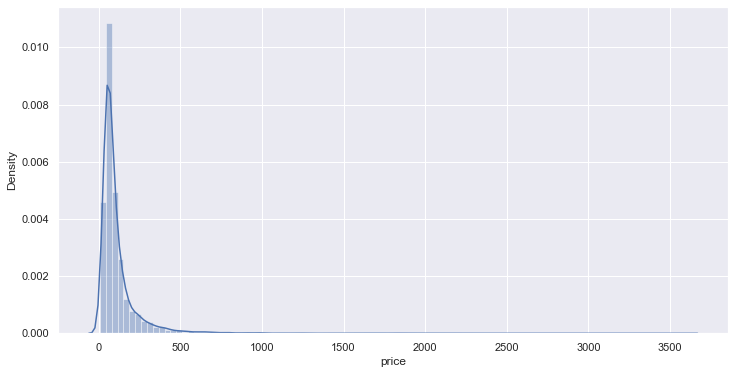

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(data['price'],bins=100,kde=True)

# OUTLIER REMOVAL

In [17]:
# Before removing outlier from the dataset. The skewness is
skewdata = data.skew(axis=0,skipna=True)
skewdata.sort_values(axis=0,ascending=True)

bath     4.205374
BHK      4.816387
price    7.978041
dtype: float64

In [18]:
data.shape

(12717, 6)

In [19]:
data[data["BHK"]>=11]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [22]:
data[data['bath']>=11]

,location,size,total_sqft,bath,price,BHK
938,5th Phase JP Nagar,9 Bedroom,1260,11.0,290.0,9
1078,BTM 1st Stage,9 Bedroom,3300,14.0,500.0,9
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
1953,KR Puram,8 Bedroom,1200,12.0,110.0,8
1979,Hongasandra,8 Bedroom,990,12.0,120.0,8
3096,Jp nagar 8th Phase .,10 BHK,12000,12.0,525.0,10
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [23]:
data[data["price"]>=1000]

,location,size,total_sqft,bath,price,BHK
408,Rajaji Nagar,7 BHK,12000,6.0,2200.0,7
605,Malleshwaram,7 BHK,12000,7.0,2200.0,7
743,Cunningham Road,4 BHK,5270,4.0,1250.0,4
1299,Chamrajpet,9 Bedroom,4050,7.0,1200.0,9
1311,D Souza Layout,3 BHK,4634,4.0,1015.0,3
1873,Kasavanhalli,5 Bedroom,5800,7.0,1200.0,5
2286,Kathreguppe,4 Bedroom,3200,4.0,1200.0,4
2400,Cholanayakanahalli,5 Bedroom,3000,6.0,1000.0,5
2620,Sathya Sai Layout,6 BHK,11338,9.0,1000.0,6
2623,Dodsworth Layout,4 Bedroom,30000,4.0,2100.0,4


#####  Droping BHK and bath more than or equal to 11 and prices greater than or equal to 1000, as they are very few in the dataset.

In [24]:
l1 = list(data[data['BHK']>=11].index.values)
l2 = list(data[data['bath']>=11].index.values)
l3 = list(data[data['price']>=1000].index.values)

l = l1+l2+l3
l = list(set(l))
len(l)

71

In [25]:
data.drop(l,axis=0,inplace=True)
data.shape

(12646, 6)

In [26]:
data.describe()

,bath,price,BHK
count,12646.000000,12646.000000,12646.000000
mean,2.678475,107.546003,2.790052
std,1.225299,106.685211,1.186239
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,10.000000,995.000000,10.000000


<AxesSubplot:xlabel='price', ylabel='Density'>

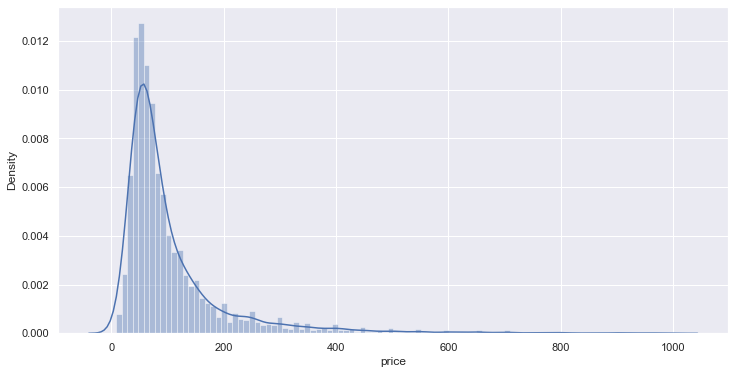

In [27]:
plt.figure(figsize=(12,6))
sns.distplot(data['price'],bins=100,kde=True)

2     5244
3     4627
4     1350
1      631
5      335
6      218
7       97
8       85
9       49
10      10
Name: BHK, dtype: int64


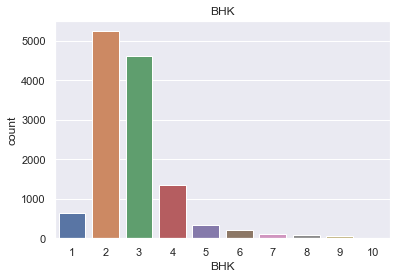

2.0     6546
3.0     3174
4.0     1185
1.0      762
5.0      507
6.0      262
7.0       96
8.0       62
9.0       39
10.0      13
Name: bath, dtype: int64


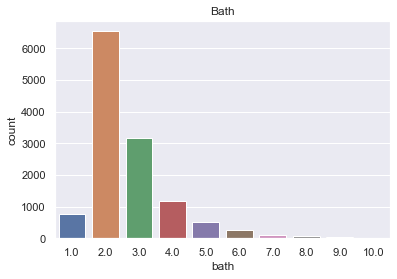

In [28]:
print(data["BHK"].value_counts())
ax = sns.countplot(x="BHK", data=data)
plt.title("BHK")
plt.show()
print(data["bath"].value_counts())
ax = sns.countplot(x="bath", data=data)
plt.title("Bath")
plt.show()

In [29]:
# After removing outlier from the dataset. This is final skewness 
skewdata = data.skew(axis=0,skipna=True)
skewdata.sort_values(axis=0,ascending=True)

bath     1.942643
BHK      1.980429
price    3.385381
dtype: float64

In [30]:
price = data.copy()

In [31]:
price.shape

(12646, 6)

# Converting total_sqft from string object to float type.

In [32]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
price[~price['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [34]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
#data=data.copy()
price['total_sqft']=price['total_sqft'].apply(convert_sqft_tonum)

In [36]:
# Checking if any null data is generated.
price.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [37]:
# Dropping null data if generated.

price.dropna(axis=0,inplace=True)
price.shape

(12600, 6)

In [38]:
# Adding a new column price_per_sqft into the price dataset.
price["price_per_sqft"] = price["price"]*100000/price["total_sqft"]
price.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [39]:
# Counting total no. of respective location in the dataset.
price['location'] = price['location'].apply(lambda x: x.strip())
location_stats = price['location'].value_counts(ascending=False)
location_stats

Whitefield                515
Sarjapur  Road            372
Electronic City           288
Kanakpura Road            240
Thanisandra               230
                         ... 
Deepanjali Nagar            1
Haralur Road,               1
P Krishnappa Layout         1
Raja Rajeshwari Nagara      1
Huttanahalli                1
Name: location, Length: 1275, dtype: int64

In [40]:
# Finding location that are less than or equal to 10 in count.
print(len(location_stats[location_stats<=10]))
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1044


Nagappa Reddy Layout      10
Ganga Nagar               10
Kalkere                   10
Thyagaraja Nagar          10
Marsur                    10
                          ..
Deepanjali Nagar           1
Haralur Road,              1
P Krishnappa Layout        1
Raja Rajeshwari Nagara     1
Huttanahalli               1
Name: location, Length: 1044, dtype: int64

In [41]:
price['location'] = price['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(price.location.unique())

232

In [42]:
price.shape

(12600, 7)

#### Here we will discard some more data. Because, normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [43]:
price[price["total_sqft"]/price["BHK"]<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [44]:
price = price[~(price["total_sqft"]/price["BHK"]<300)]
print(price.shape)

(11881, 7)


In [45]:
max(price["price_per_sqft"])

176470.58823529413

# Here we find that min price per sqft is 267 rs/sqft whereas max is 176470.5882, this shows a wide variation in property prices. We should remove outliers per location using mean and one Standard Deviation

In [46]:
def remove_pps_outliers(price):
    price_out = pd.DataFrame()
    for key, subprice in price.groupby('location'):
        m = np.mean(subprice["price_per_sqft"])
        st = np.std(subprice["price_per_sqft"])
        reduced_price = subprice[(subprice["price_per_sqft"]>(m-st)) & (subprice["price_per_sqft"]<=(m+st))]
        price_out = pd.concat([price_out,reduced_price],ignore_index=True)
    return price_out
price = remove_pps_outliers(price)
price.shape

(9748, 7)

<AxesSubplot:xlabel='price', ylabel='total_sqft'>

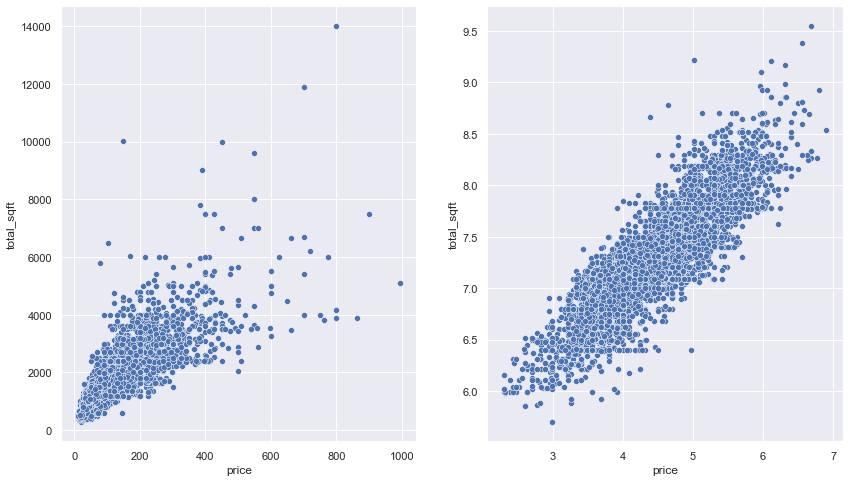

In [47]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.scatterplot(price["price"],price["total_sqft"])
plt.subplot(1,2,2)
sns.scatterplot(np.log(price["price"]),np.log(price["total_sqft"]))

#### From above plot it's cleared that the skewness in price and total_sqft is removed by log transformation.

In [48]:
# Outlier removal
price["price"] = np.log(price["price"])
price["total_sqft"] = np.log(price["total_sqft"])

<AxesSubplot:xlabel='price', ylabel='Density'>

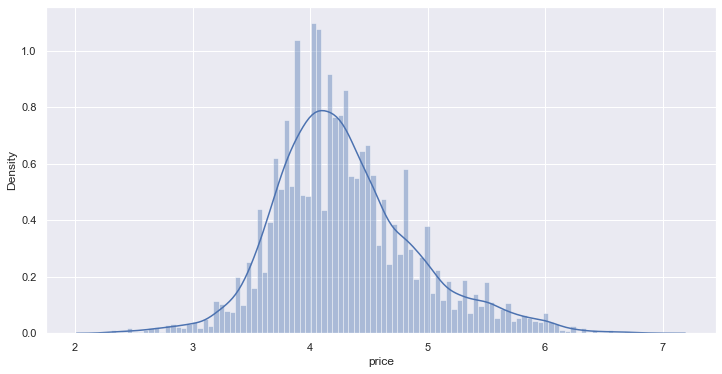

In [49]:
plt.figure(figsize=(12,6))
sns.distplot(price['price'],bins=100,kde=True)

In [50]:
# After log transformation on price and total_sqft, the final skewness in the data.
skewdata1 = price.skew(axis=0,skipna=True)
skewdata1.sort_values(axis=0,ascending=True)

price             0.606094
total_sqft        0.612928
BHK               1.538364
bath              1.858624
price_per_sqft    2.062668
dtype: float64

In [51]:
#Using One Hot Encoding for Location
dummies = pd.get_dummies(price.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Concatinating both the dataframes together
price = pd.concat([price,dummies.drop('other',axis=1)],axis=1)
price.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,7.955074,4.0,6.059123,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,7.396335,3.0,5.267858,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,7.536364,2.0,5.459586,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,7.090077,2.0,4.867534,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,7.118826,2.0,4.997212,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
price = price.drop(['location',"size",'price_per_sqft'],axis=1)
price.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,7.955074,4.0,6.059123,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.396335,3.0,5.267858,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.536364,2.0,5.459586,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.090077,2.0,4.867534,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.118826,2.0,4.997212,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
price.shape

(9748, 235)

# MODEL BUILDING AND TESTING

In [55]:
y = price["price"]
x = price.drop(['price'],axis=1)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33)

In [57]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

LR = LinearRegression().fit(x_train,y_train)
print("Train score = ",LR.score(x_train,y_train))
print("Test score = ",LR.score(x_test,y_test))

Train score =  0.8511086531036078
Test score =  0.8376097586743187


In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.84294191, 0.84753926, 0.83625973, 0.83939412, 0.83878519])

In [59]:
pred_lr = LR.predict(x_train)
mean_squared_error(y_train,pred_lr,squared=False)

0.23625344729872474

In [60]:
pred_LR = LR.predict(x_test)
mean_squared_error(y_test,pred_LR,squared=False)

0.23996601326191858

In [61]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor().fit(x_train, y_train)
print("Train score = ",RFR.score(x_train,y_train))
print("Test score = ",RFR.score(x_test,y_test))

Train score =  0.9476705778025094
Test score =  0.791152117129498


In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
cross_val_score(RandomForestRegressor(), x, y, cv=cv)

array([0.79830405, 0.81121448, 0.79393063, 0.8055395 , 0.80221633])

In [63]:
pred_ = RFR.predict(x_train)
mean_squared_error(y_train,pred_,squared=False)

0.14006073292825197

In [64]:
pred_RFR = RFR.predict(x_test)
mean_squared_error(y_test,pred_RFR,squared=False)

0.27213525698576113

In [65]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
print("Train accuracy=",xgb.score(x_train, y_train))
xgb_pred = xgb.predict(x_test)
print ("Test accuracy=",xgb.score(x_test,y_test))

Train accuracy= 0.8807131471372338
Test accuracy= 0.8415119787691654


In [66]:
cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
cross_val_score(XGBRegressor(), x, y, cv=cv)

array([0.8481921 , 0.8520653 , 0.84154355, 0.84509678, 0.84540974])

In [67]:
pred_xgb = xgb.predict(x_train)
mean_squared_error(y_train,pred_xgb,squared=False)

0.21146559336400347

In [68]:
pred_x = xgb.predict(x_test)
mean_squared_error(y_test,pred_x,squared=False)

0.237065302567116